# EasyOCR Fundamentals

### Install and Import Dependencies

In [3]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 992.7 kB/s eta 0:00:00eta 0:00:01:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 919.3 kB/s eta 0:00:00m eta 0:00:016m0:00:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:01:010m

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Read in Images or Video

In [2]:
IMAGE_PATH = 'images/surf.jpeg'
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082600593567)]

### Draw Results

In [3]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])

top_center_x = round((result[0][0][1][0] - result[0][0][0][0])/2)
top_center_y = result[0][0][1][1]
top_center = (top_center_x, top_center_y)

In [4]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

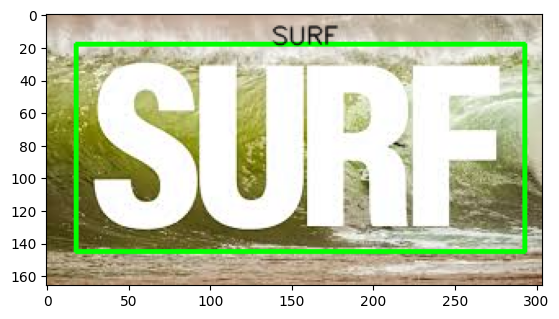

In [7]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 2)
img = cv2.putText(img, text, top_center, font, .5, (0,0,0), 1, cv2.LINE_AA)
plt.imshow(img)
plt.show()

### Handling Multiple Lines

In [8]:
MUL_LINE_IMG_PATH = 'images/sign.png'
reader = easyocr.Reader(['en'], gpu=False)
lines = reader.readtext(MUL_LINE_IMG_PATH)
lines

Using CPU. Note: This module is much faster with a GPU.


[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256601171587),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9683688296531474),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973806374694)]

In [11]:
lines[0][1]

'HEAD PROTECTION'

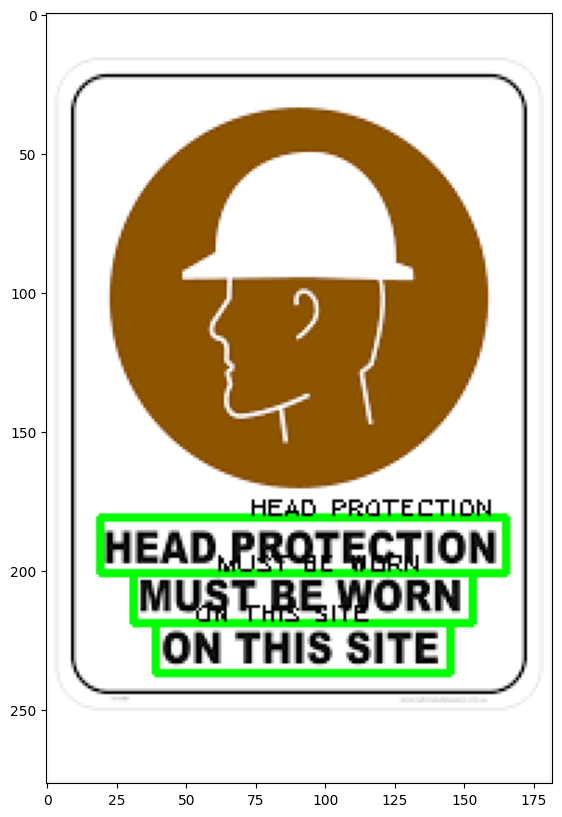

In [12]:
img = cv2.imread(MUL_LINE_IMG_PATH)
font = cv2.FONT_HERSHEY_PLAIN

for line in lines:
    top_left = tuple(line[0][0])
    bottom_right = tuple(line[0][2])
    
    top_center_x = round((line[0][1][0] - line[0][0][0])/2)
    top_center_y = line[0][1][1]
    top_center = (top_center_x, top_center_y)
    
    text = line[1]
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 2)
    img = cv2.putText(img, text, top_center, font, 0.6, (0,0,0), 1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()